<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
filepath ="Sample.jpg"
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

(1049088, 3)


In [ ]:
K=15
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()

In [ ]:
cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

(740633864.1220446,
 array([[0],
        [0],
        [0],
        ...,
        [7],
        [7],
        [7]], dtype=int32),
 array([[170.92932 , 193.09172 , 218.27147 ],
        [230.48572 , 217.00465 , 195.46904 ],
        [ 89.67233 ,  86.87207 ,  71.83133 ],
        [170.55383 , 171.72751 , 170.31482 ],
        [ 57.433723,  55.522446,  40.73815 ],
        [208.42421 , 165.19217 , 121.87786 ],
        [126.05772 , 126.85749 , 126.2326  ],
        [ 16.475628,  24.652987,  17.723019],
        [154.71008 , 109.69566 ,  63.571537]], dtype=float32))

In [ ]:
model = KMeans(K)
model.fit(vectorized)
pred = model.predict(vectorized)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

In [ ]:
center[label.flatten()], vectorized

(array([[157, 187, 220],
        [157, 187, 220],
        [157, 187, 220],
        ...,
        [ 11,  19,  13],
        [ 11,  19,  13],
        [ 11,  19,  13]], dtype=uint8),
 array([[135., 165., 203.],
        [137., 167., 205.],
        [139., 169., 207.],
        ...,
        [ 17.,  21.,  24.],
        [ 16.,  21.,  24.],
        [ 21.,  26.,  29.]], dtype=float32))

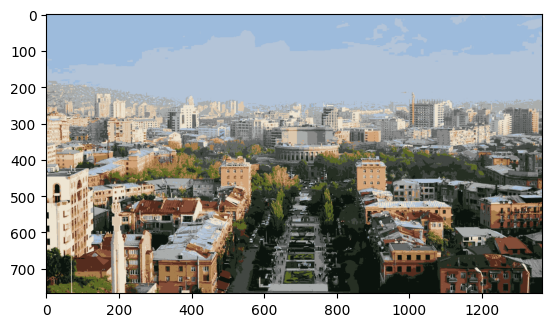

In [ ]:
plt.imshow(result_image)
plt.show()